<img src="Problem.svg" alt="Problem" width="100%"/>

## Packages ##

First, let's run the cell below to import all the packages that you will need. 
- [numpy](www.numpy.org) is the fundamental numerical library for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a fundamental library for plotting and visualizing data using Python.
- [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) is a sub-package that provides several integration techniques including an ordinary differential equation integrator.
- [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) integrates a system of ordinary differential equations.

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

## Runge-Kutta Integrators##
The Runge-Kutta methods ([Link to the Wikipedia page](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)) are a family of implicit and explicit iterative methods, which include the well-known routine called the Euler Method, used in temporal discretization for the approximate solutions of ordinary differential equations. The most widely known member of the Runge–Kutta family is generally referred to as "**RK4**", the "**Classic Runge–Kutta method**" or simply as "the Runge–Kutta method". 

Let an initial value problem be specified as follows:

$$\frac {dy}{dx}=f(x,y)$$
$$y(x_{0})=y_{0}$$
Here $y$ is an unknown function (scalar or vector) of $x$, which we would like to approximate; we are told that $\frac {dy}{dx}$, the rate at which $y$ changes, is a function of $x$ and of $y$ itself. At the initial $x_{0}$ the corresponding $y$ value is $y_{0}$. The function $f$ and the initial conditions $x_{0}$, $y_{0}$ are given.

Now pick a step-size $h > 0$ and define:

$$x_{n+1} = x_{n} + h$$
$$y_{n+1} = y_{n} + {\frac {h}{6}}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)$$

for n = 0, 1, 2, 3, ... using:

$$ k_{1} = f(x_{n},y_{n}) $$
$$ k_{2} = f\left(x_{n}+{\frac {h}{2}},y_{n}+k_1{\frac {h}{2}}\right) $$
$$ k_{3} = f\left(x_{n}+{\frac {h}{2}},y_{n}+k_2{\frac {h}{2}}\right) $$
$$ k_{4} = f\left(x_{n}+h, y_{n}+k_{3}h\right)$$

In [2]:
def dUdx(x):
    return 4 * np.exp(-0.2 * (x-5)) * (1 - np.exp(-0.2 * (x - 5)))
x0 = 5                               # Initial condition (Independent coordinate)
U0 = 10                               # Inititial Condition (Dependent coordinate)
h = 0.1                                # Step Size
xi = 0
xf = 50                              # Final point, till where you wish to iterate

n1 = int((x0-xi)/h)
n2 = int((xf-x0)/h)

x = np.arange(xi, xf+h, h)
U = np.zeros(len(x))
U[n1] = U0

for i in range(n1, n1+n2):
    k1 = dUdx(x[i])             # f(x, y)
    k2 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k1*(h/2))
    k3 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k2*(h/2))
    k4 = dUdx(x[i] + (h))       # f(x+h, y+k3*h)
    U[i+1] = U[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
h = -h
for i in range(n1+1, 0, -1):
    k1 = dUdx(x[i])             # f(x, y)
    k2 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k1*(h/2))
    k3 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k2*(h/2))
    k4 = dUdx(x[i] + (h))       # f(x+h, y+k3*h)
    U[i-1] = U[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
U_exact = np.asarray([(4 * np.exp(-0.2 * (x-5)) * (1 - np.exp(-0.2 * (x - 5)) / 2)) / -0.2 + 20 for x in x])

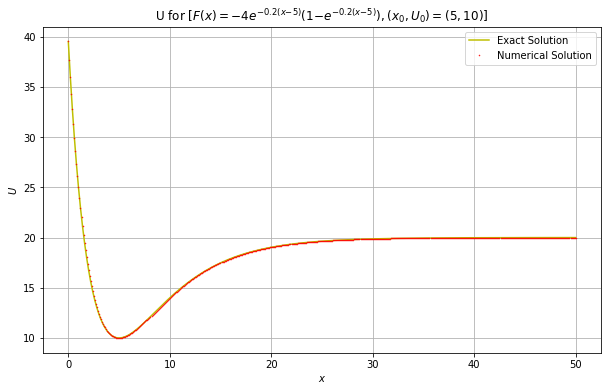

In [3]:
plt.figure(figsize=[10,6])
plt.plot(x, U_exact, 'y-', label = "Exact Solution")
plt.plot(x, U, 'r.', label = "Numerical Solution", markersize = 1)
plt.title("U for [$F(x) = −4e^{−0.2(x−5)}(1 − e^{−0.2(x−5)}) , (x_0, U_0) = (5, 10)$]")
plt.xlabel("$x$")
plt.ylabel("$U$")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("Q1.svg")
plt.show()

In [16]:
def calcVelocity(totalEnergy, U):
    E = np.ones(len(x)) * totalEnergy

    KE = E - U

    xSelect = np.zeros(len(x))
    v = np.zeros(len(x))
    v = np.empty((501,1))
    for i in v:
        i = np.nan

    for i,j in enumerate(KE):
        if(j >= 0):
            v[i] = abs(math.sqrt(2 * j))
    return v
vClosedp = calcVelocity(15,U)  
vClosedn = -1 * vClosedp           # Velocity is ±v
vOpenp = calcVelocity(30,U)
vOpenn = -1 * vOpenp

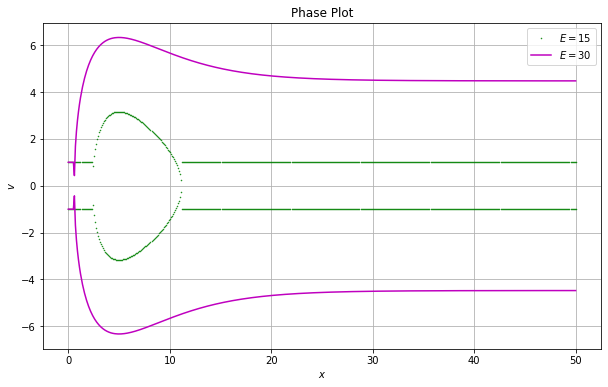

In [21]:
plt.figure(figsize=[10,6])
#plt.plot(x, v_exact, 'y.', label = "Exact Phase Plot", markersize = 1)
plt.plot(x, vClosedp,'g.', label = "$ E = 15 $", markersize = 1)
plt.plot(x, vClosedn,'g.', markersize = 1)
plt.plot(x, vOpenp,'m-', label = "$ E = 30 $", markersize = 1)
plt.plot(x, vOpenn,'m-', markersize = 1)
plt.title("Phase Plot")
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("PhasePlot.svg")
plt.show()

In [9]:
x0 = 5                               # Initial condition (Independent coordinate)
U0 = 10                               # Inititial Condition (Dependent coordinate)
h = 0.1                                # Step Size
xi = 0
xf = 50                              # Final point, till where you wish to iterate

n1 = int((x0-xi)/h)
n2 = int((xf-x0)/h)

x = np.arange(xi, xf+h, h)
U = np.zeros(len(x))
U[n1] = U0

for i in range(n1, n1+n2):
    k1 = dUdx(x[i])             # f(x, y)
    k2 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k1*(h/2))
    k3 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k2*(h/2))
    k4 = dUdx(x[i] + (h))       # f(x+h, y+k3*h)
    U[i+1] = U[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
h = -h
for i in range(n1+1, 0, -1):
    k1 = dUdx(x[i])             # f(x, y)
    k2 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k1*(h/2))
    k3 = dUdx(x[i] + (h/2))     # f(x+(h/2), y+k2*(h/2))
    k4 = dUdx(x[i] + (h))       # f(x+h, y+k3*h)
    U[i-1] = U[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
U_exact = np.asarray([(4 * np.exp(-0.2 * (x-5)) * (1 - np.exp(-0.2 * (x - 5)) / 2)) / -0.2 + 20 for x in x])

In [10]:
totalEnergy = 15
E = np.ones(len(x)) * totalEnergy

KE = E - U

xSelect = np.zeros(len(x))
v = np.zeros(len(x))
v = np.empty((501,1))
for i in v:
    i = np.nan
#v_exact = np.empty((501,1))

for i,j in enumerate(KE):
    if(j >= 0):
        v[i] = abs(math.sqrt(2 * j))
        #v_exact[i] = math.sqrt(2 * j)

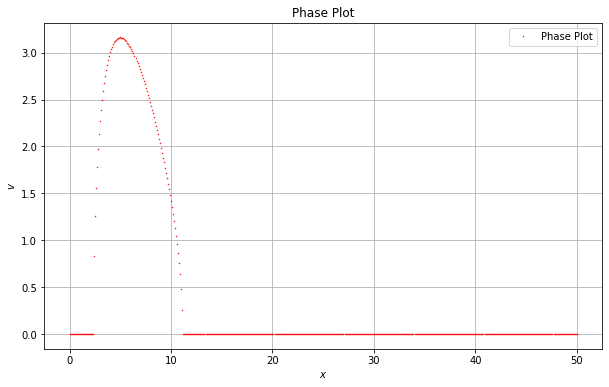

In [11]:
plt.figure(figsize=[10,6])
#plt.plot(x, v_exact, 'y.', label = "Exact Phase Plot", markersize = 1)
plt.plot(x, v,'r.', label = "Phase Plot", markersize = 1)
plt.title("Phase Plot")
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("PhasePlot.svg")
plt.show()